# Google Play Store Data Analysis

## Importing Necessary Libraries

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset and Read the Columns

In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\sujee\OneDrive\Desktop\Jupyter_Project\Google_Play_Store\googleplaystore.csv")

# Display the first 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Cleaning up the data

### Removing Unnecessary Columns

In [8]:
df.drop(columns=['Last Updated', 'Current Ver', 'Android Ver', 'Size'], inplace=True)
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [9]:
# Drop duplicate values 

df.dropna(inplace=True)
df_cleaned = df.drop_duplicates(subset=['App'], keep='first')

In [10]:
# Checking the missing values

print(df.isnull().sum())  

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64


In [12]:
# Remove 'Free' from Installs column
df = df[df['Installs'] != 'Free']

# Ensure 'Installs' is a string before applying str functions
df['Installs'] = df['Installs'].astype(str)

# Remove '+' and ',' characters
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

# Convert 'Installs' to float
df['Installs'] = df['Installs'].astype(float)

# Verify unique values
print(df['Installs'].unique())

[1.e+04 5.e+05 5.e+06 5.e+07 1.e+05 5.e+04 1.e+06 1.e+07 5.e+03 1.e+08
 1.e+09 1.e+03 5.e+08 1.e+02 5.e+02 1.e+01 5.e+00 5.e+01 1.e+00]


In [13]:
# Convert Reviews to Numeric (Handling Errors)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ensure Price is a String Before Filtering
df['Price'] = df['Price'].astype(str)

# Remove Non-Numeric Price Values
df = df[df['Price'].str.contains('[a-zA-Z]', regex=True) == False]

# Convert Price to Float After Cleaning
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Verify Data Types
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object


## Data Exploration!

### Most Popular App Categories

In [14]:
# Count apps per category
category_counts = df['Category'].value_counts()

# Display top categories
category_counts.head(10)

Category
FAMILY             1747
GAME               1097
TOOLS               734
PRODUCTIVITY        351
MEDICAL             350
COMMUNICATION       328
FINANCE             323
SPORTS              319
PHOTOGRAPHY         317
PERSONALIZATION     314
Name: count, dtype: int64

##### The most popular categories provide insights into dominant app types.

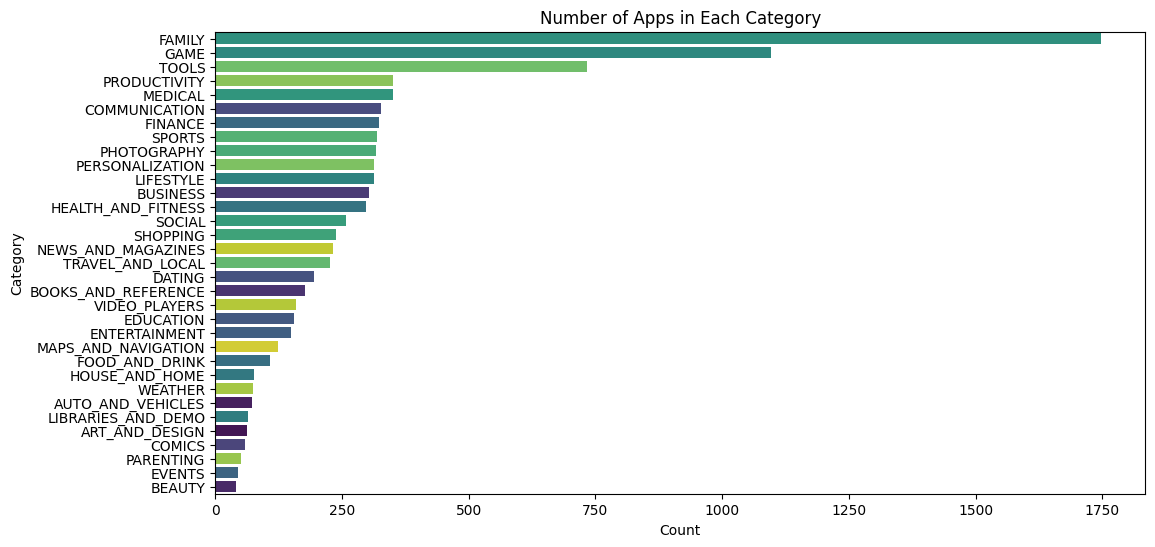

In [15]:
# Count of apps per category
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index,hue=df['Category'], palette='viridis')
plt.title("Number of Apps in Each Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

##### The most popular categories is Family.

### Most Installed App

In [26]:
# Display top installed apps
top_installed = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print(top_installed)

                               App      Installs
3816                   Google News  1.000000e+09
3996  Google Chrome: Fast & Secure  1.000000e+09
451                          Gmail  1.000000e+09
3117     Maps - Navigate & Explore  1.000000e+09
9844                   Google News  1.000000e+09
1654                Subway Surfers  1.000000e+09
5395                 Google Photos  1.000000e+09
411   Google Chrome: Fast & Secure  1.000000e+09
3523                  Google Drive  1.000000e+09
865              Google Play Games  1.000000e+09


##### This are the most installed apps reveal user preferences in the Play Store.

### Average Rating Per Category

In [22]:
# Calculate mean rating per category
category_ratings = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

# Display top categories by rating
category_ratings.head(10)

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64

##### The highest-rated categories highlight where users are most satisfied.

### What is the distribution of ratings?

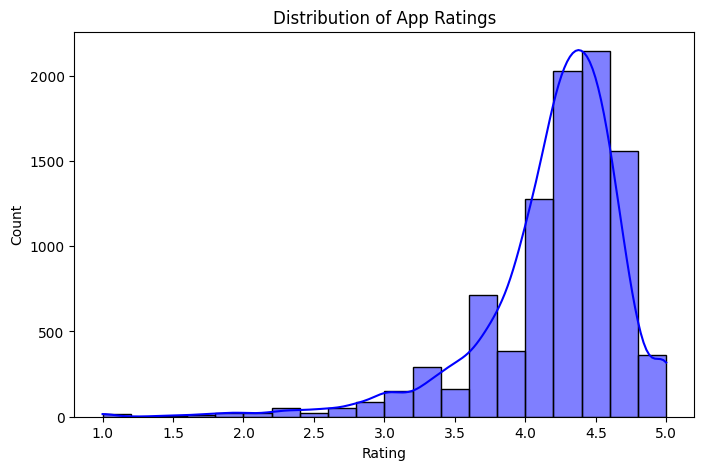

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True, color='blue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

##### Most apps have high ratings (4.5), showing user satisfaction.

### What are the top 10 most installed app categories?

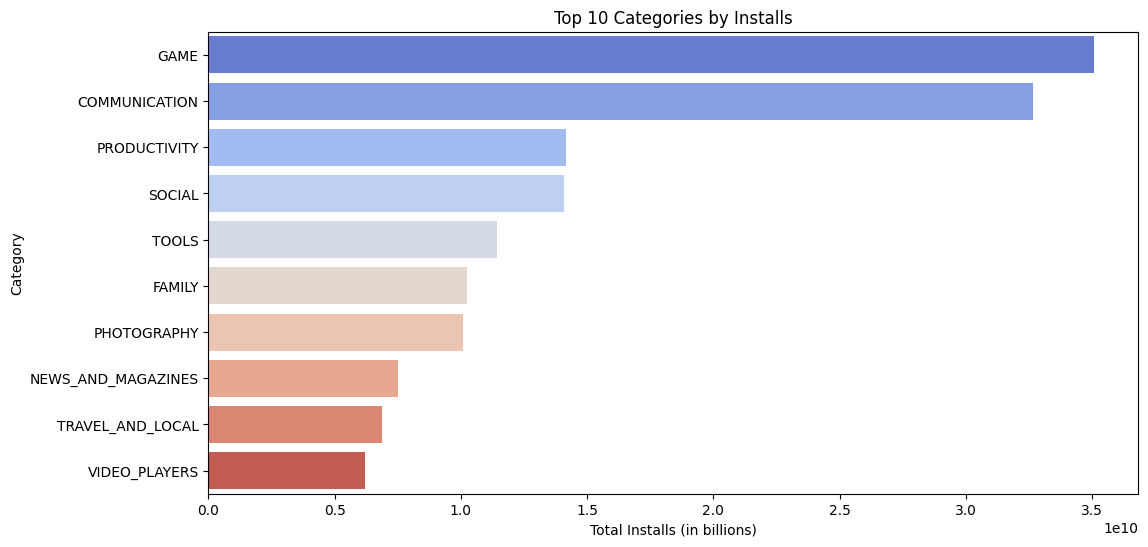

In [29]:
df_category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_category_installs.values, y=df_category_installs.index, hue=df_category_installs.index, palette='coolwarm')
plt.title("Top 10 Categories by Installs")
plt.xlabel("Total Installs (in billions)")
plt.ylabel("Category")
plt.show()

##### The most downloaded categories can be identified

### How are apps distributed across different categories?

### Is there a correlation between price and rating?

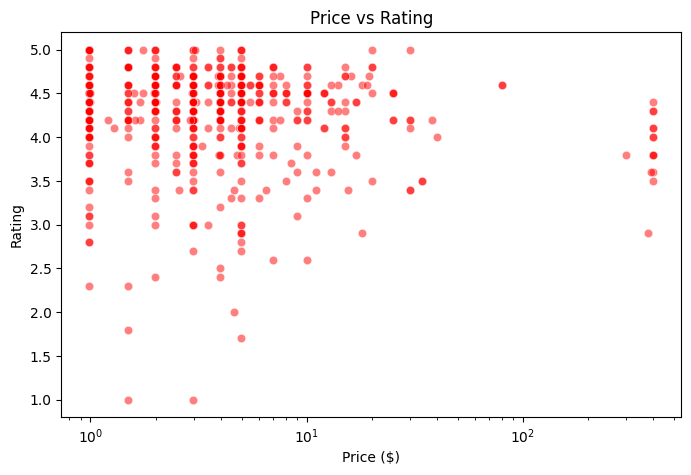

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Price'], y=df['Rating'], alpha=0.5, color='red')
plt.title("Price vs Rating")
plt.xlabel("Price ($)")
plt.ylabel("Rating")
plt.xscale('log')  
plt.show()

### How do free vs paid apps compare in average rating?

In [23]:
df_free_vs_paid = df.groupby('Type')['Rating'].mean()

print(df_free_vs_paid)

Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64


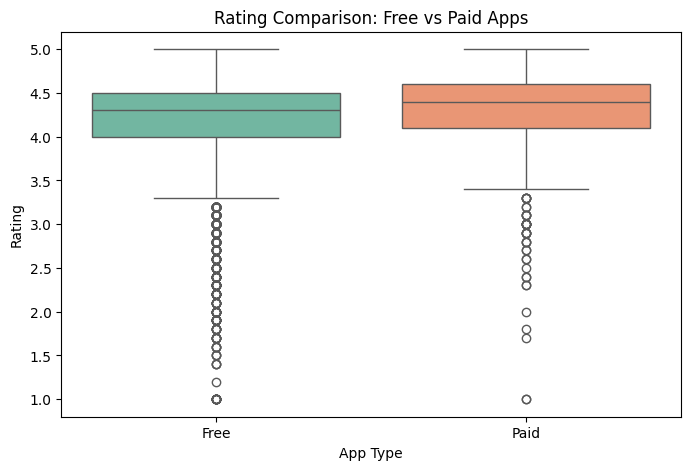

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Type'], y=df['Rating'], hue=df['Type'], palette='Set2')
plt.title("Rating Comparison: Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Rating")
plt.show()

##### There is a very slight difference between **Free** and **Paid**

### What is the relationship between number of reviews and rating?

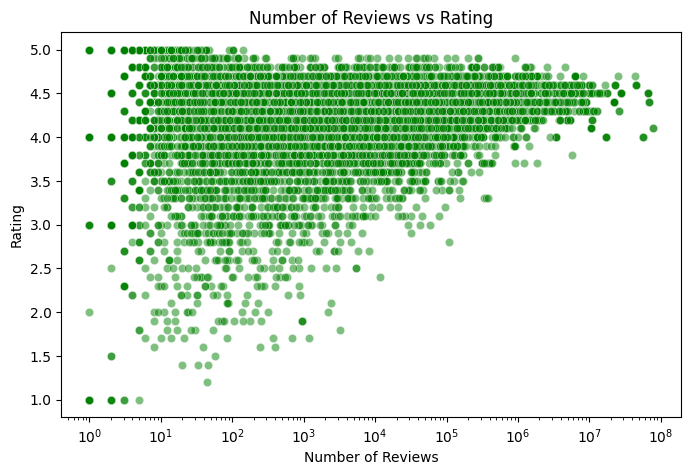

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Reviews'], y=df['Rating'], alpha=0.5, color='green')
plt.title("Number of Reviews vs Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.xscale('log')  # Use log scale if reviews vary widely
plt.show()

### Final Thought:

##### "A high number of installs doesn't guarantee high user satisfaction. Focusing on app quality, user experience, and pricing strategy is key to success in the Google Play Store."